## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 10 : Algoritma Hierarki </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Christopher Darren"
myNIM = "00000054804"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Christopher Darren
NIM: 		00000054804
Start: 		2023-05-04 08:08:58.986644
Device ID: 	3fdc3dcd-ea18-11ed-87cb-f02f74a116e8



---

### Dataset yang dipakai:

1. NBA BASKET – sumber : https://www.kaggle.com/datasets/justinas/nba-players-data
2. Breast Cancer dataset – sumber : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

##### Deskripsi Dataset:
##### 1. NBA Basket dataset merupakan sebuah dataset yang berisi statistik demografi pemain nba, dimulai dari umur, tinggi badan, berat badan, tempat kelahiran, dan detail lainnya. Dataset ini dari (12305 rows , 22 columns)
##### 2. Breast Cancer dataset merupakan sebuah dataset yang berisi statistik mengenai karakteristik kanker payudara. Dataset ini terdapat (569 rows, 33 columns).
---

### Hasil kerja

### Hierarchical Clustering : Agglomerative Clustering

#### 1. Import the important libraries and read the dataset (‘all_seasons.csv’)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Take a quick look the dataset :

In [3]:
df = pd.read_csv(r"D:\SEMESTER 4\IF540 Machine Learning\LAB\week10\all_seasons.csv")

In [4]:
df.shape

(12305, 22)

In [5]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [7]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


#### 3. Missing values identification handling

In [8]:
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [9]:
#numerical = ['age','player_height','player_weight','draft_number','gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct',
#             'usg_pct','ts_pct','ast_pct']
numerical = ['age','player_height','player_weight','pts']
categorical = ['team_abbreviation','country','draft_year','draft_round']
unused = ['Unnamed: 0','player_name','college','season']

In [10]:
df = df.drop(columns = unused)
df.shape

(12305, 18)

In [11]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [12]:
df.isnull().sum()

team_abbreviation    0
age                  0
player_height        0
player_weight        0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
dtype: int64

#### 4. Let’s visualize the dataset

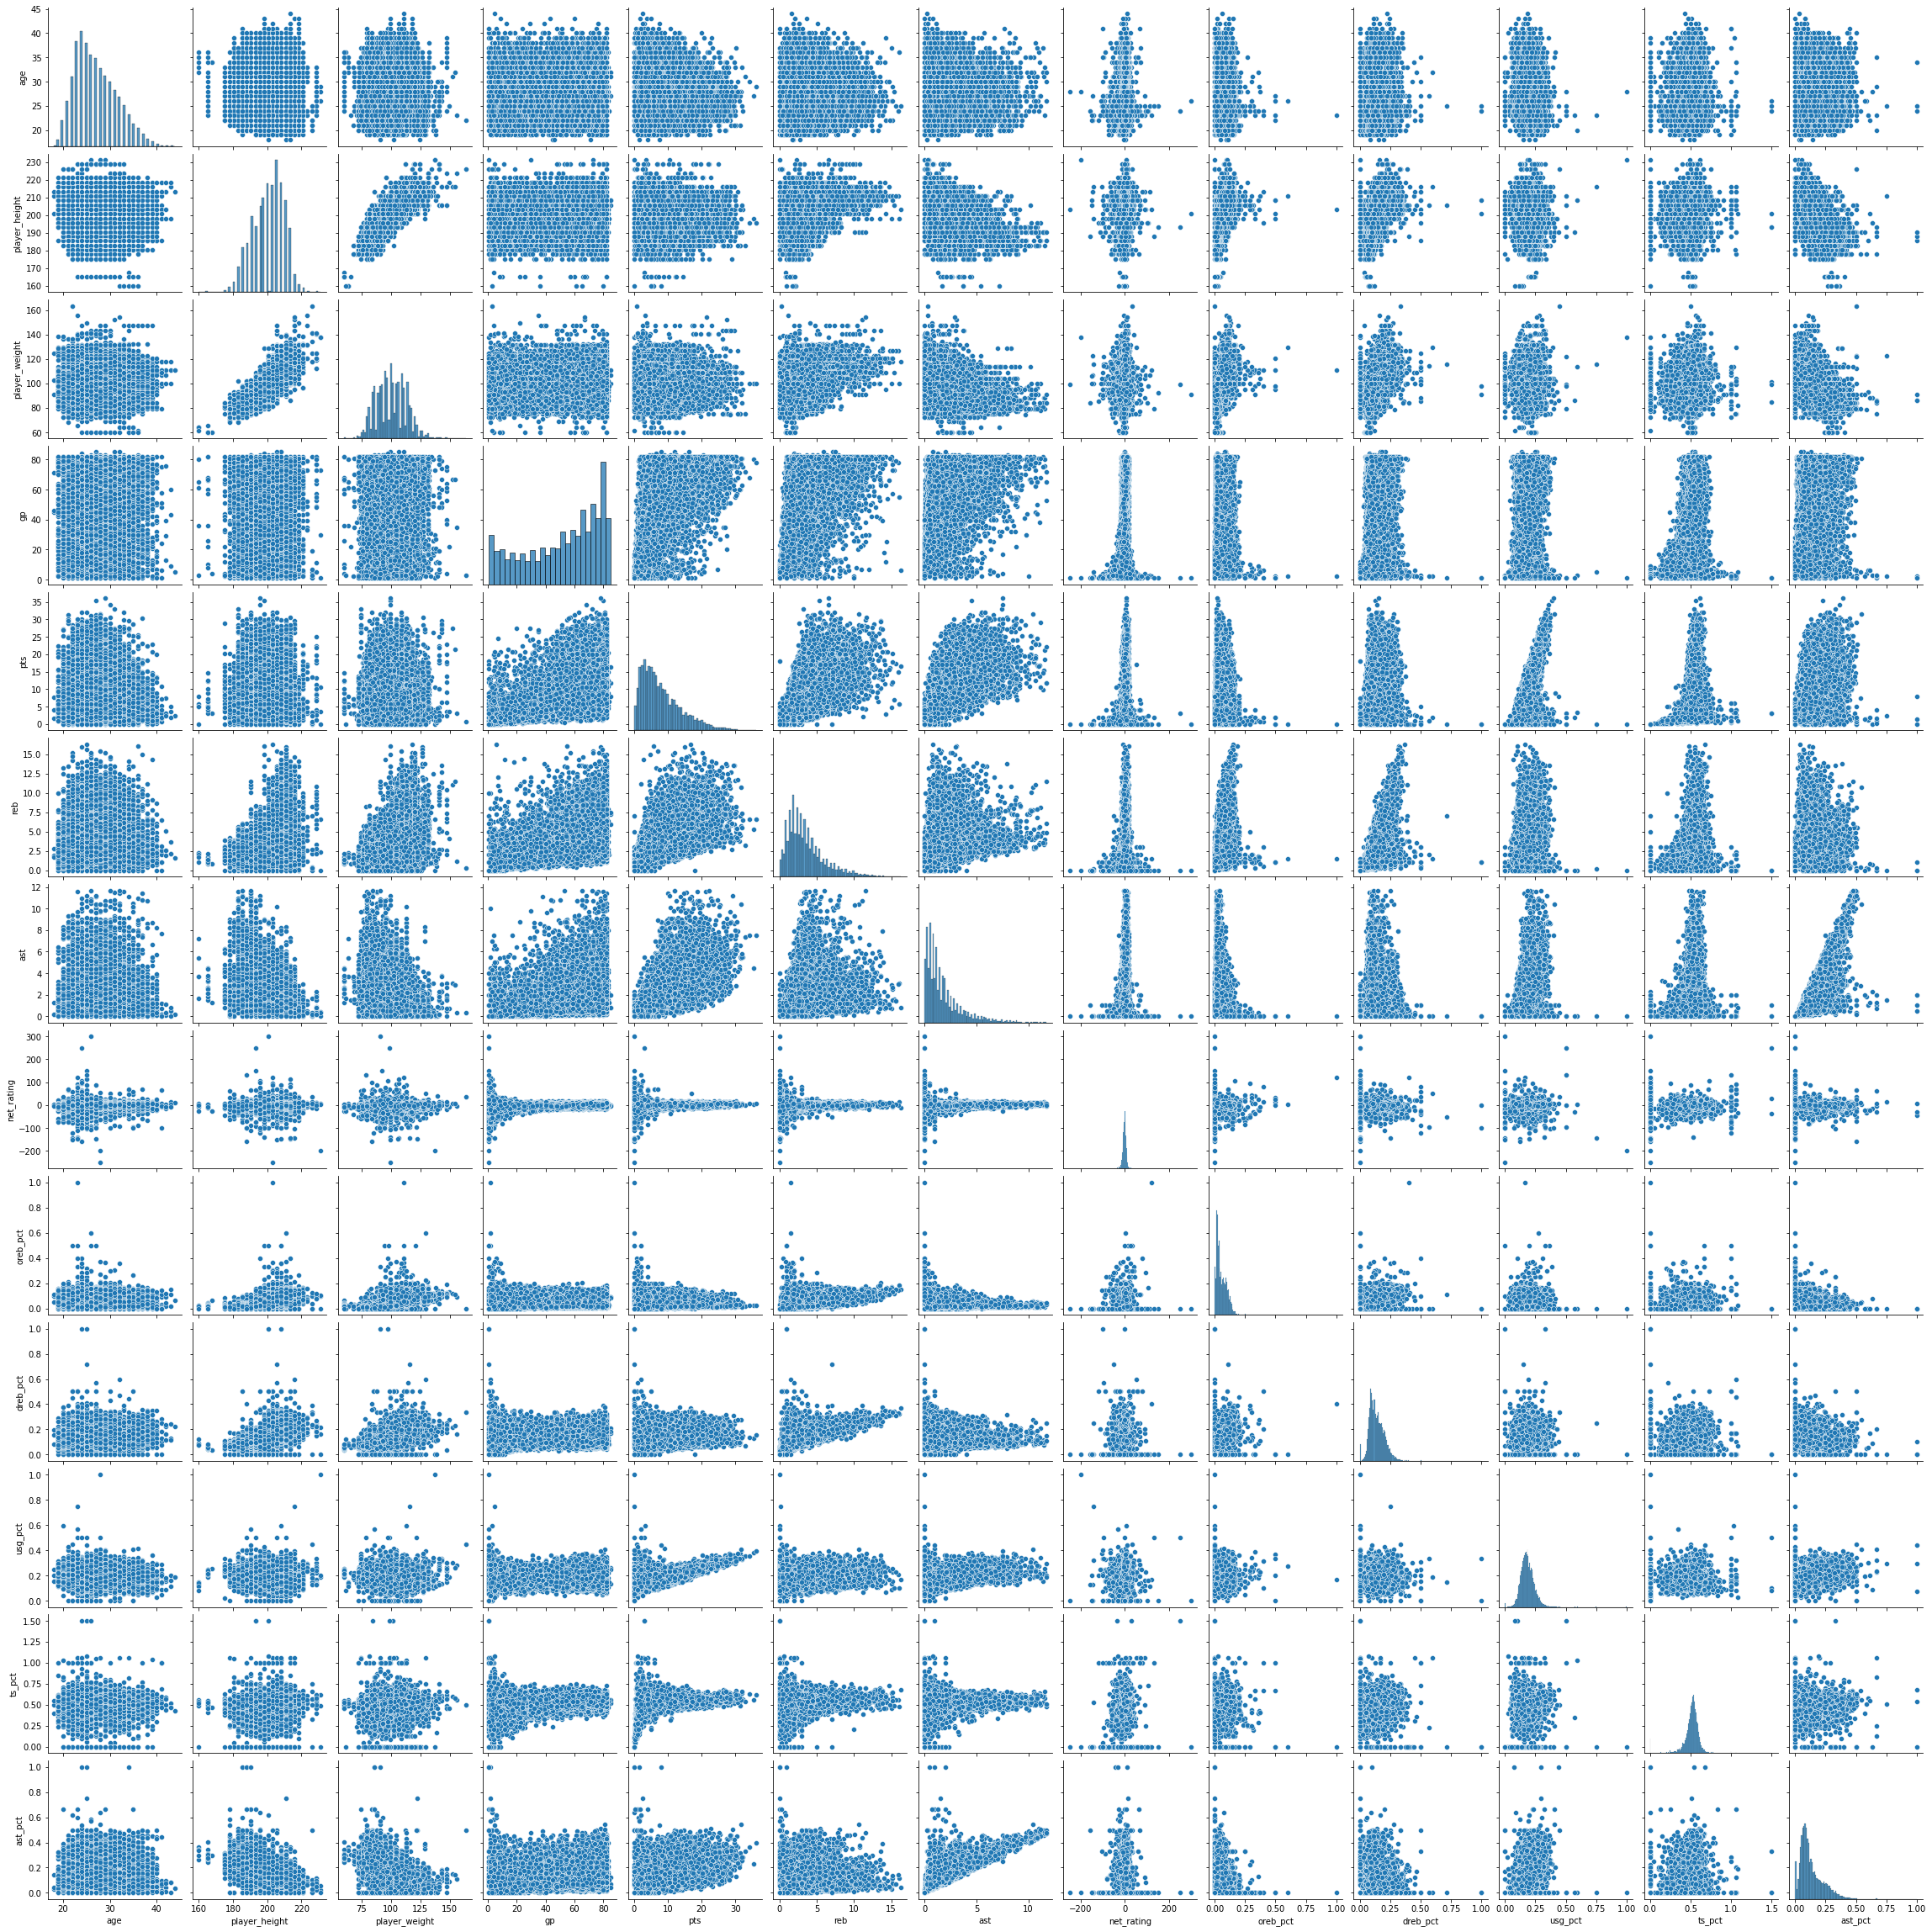

In [13]:
sns.pairplot(df)

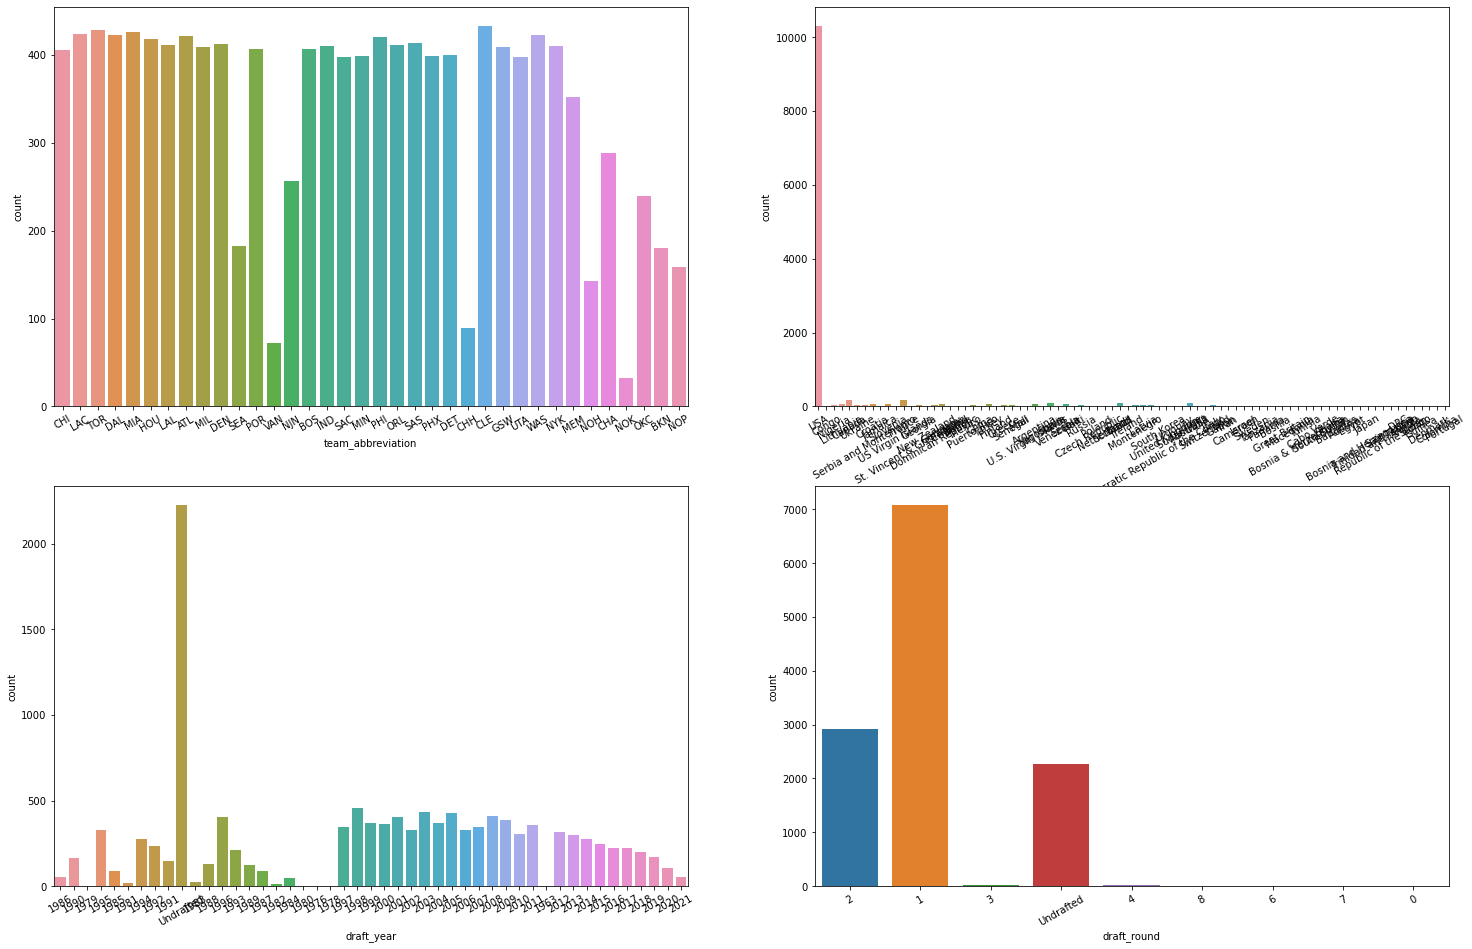

In [14]:
fig = plt.figure(figsize = (25,25))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x =cat)
    plt.xticks(rotation=30)
plt.show()

#### Above are the bar plot of all categorical feature. From the bar plot above, we can get some insight. That are :
##### 1. Team abbreviation dengan team terbanyak adalah team CLE
##### 2. Player dengan kewarganegaraan terbanyak terdapat di negara US
##### 3. Draft round terbanyak ada di round 1 dengan jumlah 7000-an
##### 4. Jumlah draft year terbanyak ada di kategori unlisted/ tidak terdaftar(Undrafted) dengan jumlah 2500-an lebih.

<AxesSubplot:>

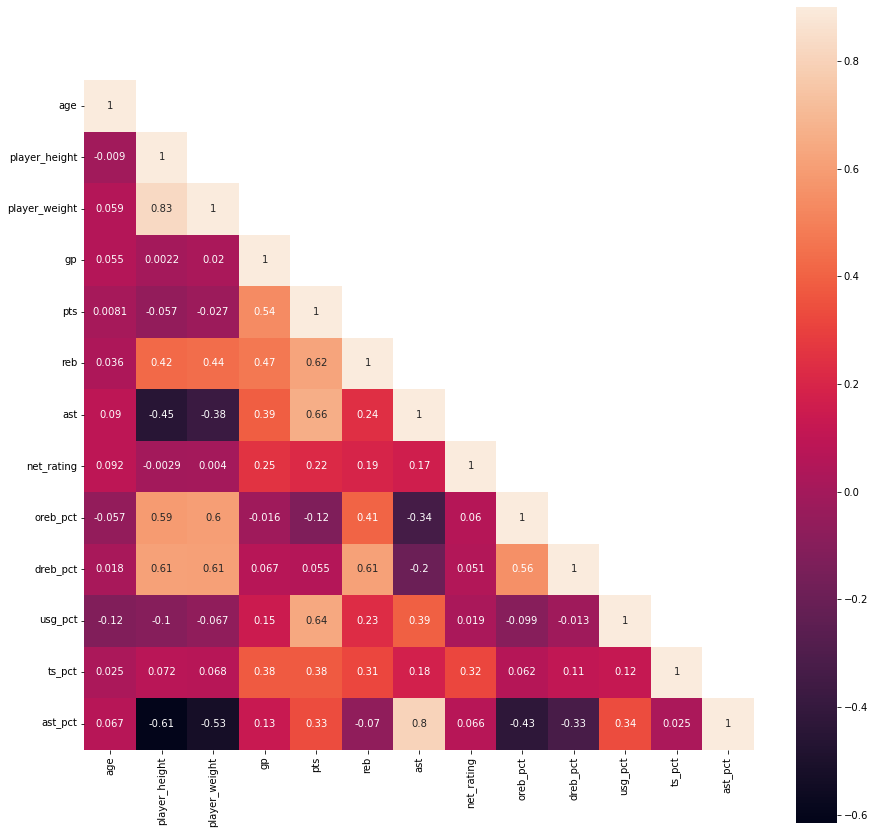

In [15]:
#create correlation
corr = df.corr(method ='pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15, 12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

#### 5. From the heatmap above we can see that the best correlation is between age and player height. But so far we will still use all the numeric features for the clustering.

In [16]:
df_cluster = pd.DataFrame()
#df_cluster['usg_pct'] = df['usg_pct']
df_cluster['age'] = df['age']
#df_cluster['ast_pct'] = df['ast_pct']
df_cluster['player_height'] = df['player_height']
df_cluster['player_weight'] = df['player_weight']
#df_cluster['gp'] = df['gp']
df_cluster['pts'] = df['pts']
#df_cluster['reb'] = df['reb']
#df_cluster['ast'] = df['ast']
#df_cluster['net_rating'] = df['net_rating']
#df_cluster['oreb_pct'] = df['oreb_pct']
#df_cluster['dreb_pct'] = df['dreb_pct']
#df_cluster['ts_pct'] = df['ts_pct']
#df_cluster['draft_round'] = df['draft_round']
df_cluster.head()

,age,player_height,player_weight,pts
0,36.0,198.12,99.790240,5.7
1,28.0,215.90,117.933920,2.3
2,39.0,205.74,95.254320,0.8
3,24.0,203.20,100.697424,3.7
4,34.0,205.74,108.862080,2.4


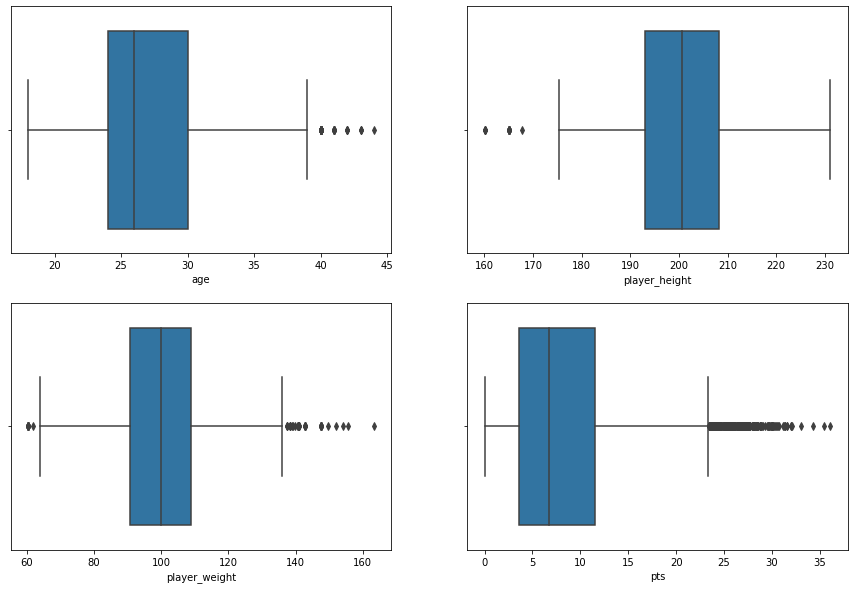

In [17]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x= num)
plt.show()

C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

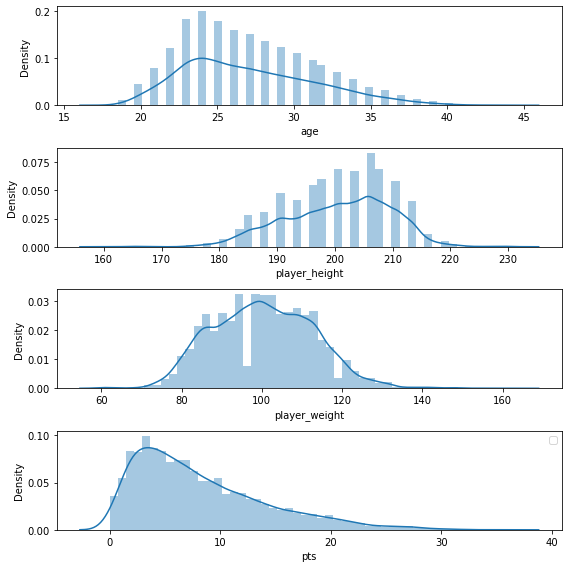

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df["age"], ax=ax1)
sns.distplot(df["player_height"], ax=ax2)
sns.distplot(df["player_weight"], ax=ax3)
sns.distplot(df["pts"], ax=ax4)
plt.tight_layout()
plt.legend()

##### From the figure above, we can see that distributions are right-skewed and kinda left skewed.

#### Feature Engineering
#### 6. We can use logarithmic transformation to reduce the outliers and distribution skewness.

C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Darren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

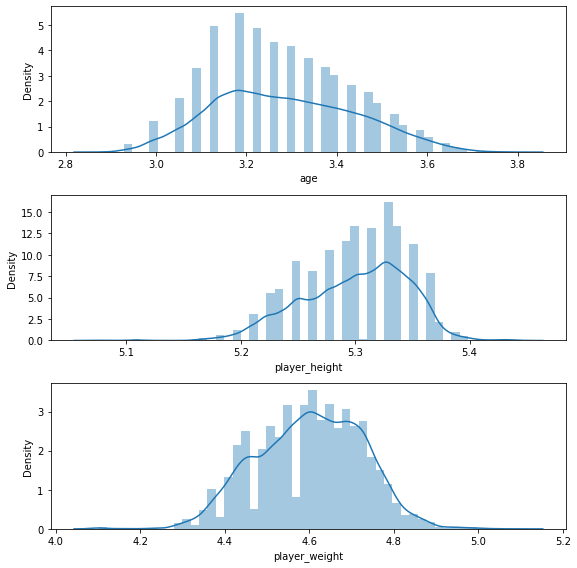

In [19]:
df_cluster_log = np.log(df_cluster[['age','player_height','player_weight']])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
sns.distplot(df_cluster_log["age"], ax=ax1)
sns.distplot(df_cluster_log["player_height"], ax=ax2)
sns.distplot(df_cluster_log["player_weight"], ax=ax3)
plt.tight_layout()

#### 7. We can see that the skewness of the distributions is eliminated. Beside log transformation, we can use Fit and Transform.

In [20]:
df_cluster_log.head()

,age,player_height,player_weight
0,3.583519,5.288873,4.603070
1,3.332205,5.374815,4.770124
2,3.663562,5.326613,4.556550
3,3.178054,5.314191,4.612120
4,3.526361,5.326613,4.690082


#### 8. Preprocessing the dataset using StandardScaler()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

#### 9. Models the dataset using Hierarchical Agglomerative Clustering.

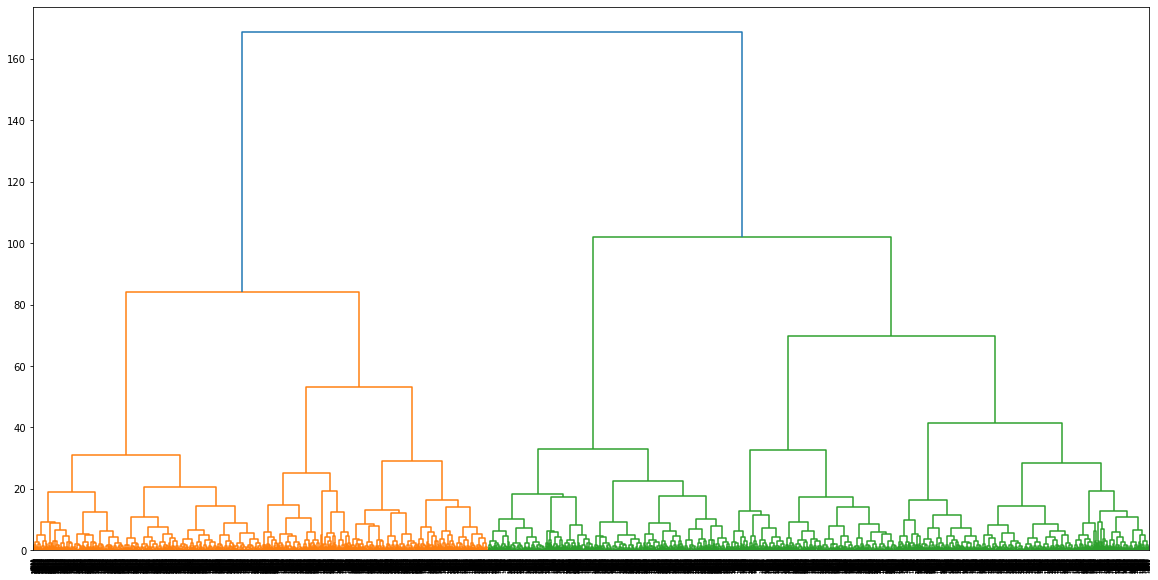

In [22]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

#### 10. From the dendrogram above, we can see that the most optimal n_clusters is 3

Hierarchical Agglomerative Clustering


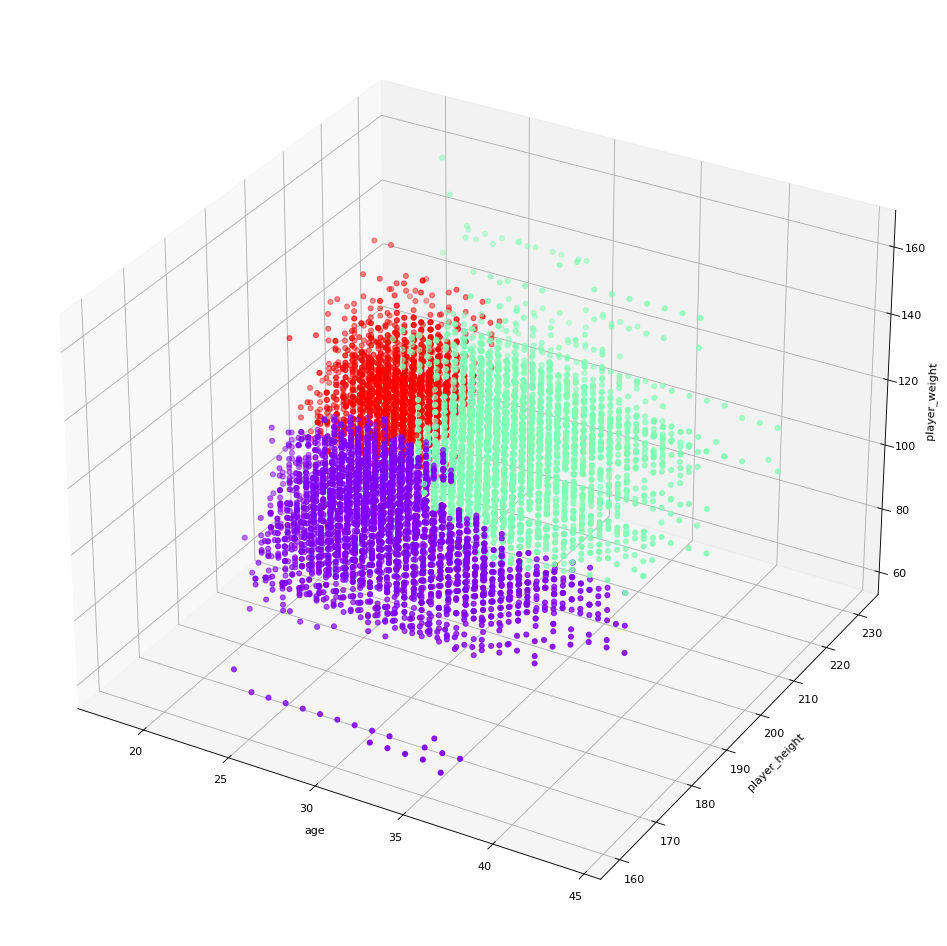

In [23]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
model = AgglomerativeClustering(n_clusters=3)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['age'],df_cluster['player_height'],df_cluster['player_weight'],c=hac_labels,cmap='rainbow')

xLabel = ax.set_xlabel('age', linespacing=3.2)
yLabel = ax.set_ylabel('player_height', linespacing=3.1)
zLabel = ax.set_zlabel('player_weight', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [24]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,age,player_height,player_weight,pts
Cluster,,,,
0,25.9,192.2,89.7,8.4
1,30.6,205.4,107.1,8.3
2,23.3,208.2,108.9,7.5


#### Cluster 0 : Umur muda, cukup tinggi, berat badan paling ringan, point paling tinggi
#### Cluster 1 : Umur tertua, tinggi, berat badan berat, point kedua tertinggi setelah cluster 0
#### Cluster 2 : Umur paling muda, paling tinggi,berat badan kedua paling berat setelah cluster 1, points paling kecil

### The Dendrogram

#### 11. Import the required libraries :

In [25]:
#The Dendrogram using breastcancer dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 12. Look the data and look at the first few rows

In [26]:
data = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week10\data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
data.shape

(569, 33)

In [29]:
#encoding

def encode_data(feature_name):
    '''
    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with
    '''
    mapping_dict = {}
    
    unique_values = list(dataLogistic[feature_name].unique())
    
    
    for idx in range(len(unique_values)):
        
        mapping_dict[unique_values[idx]] = idx
        
    return mapping_dict


data['diagnosis'].replace({'M':0,'B': 1}, inplace = True)

In [30]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [31]:
cleandata = data.drop(['Unnamed: 32','id'], axis=1)
cleandata

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### 13. Let’s normalize the data and bring all the variables to the same scale:

In [32]:
from sklearn.preprocessing import normalize
data_scaled=normalize(cleandata)
data_scaled=pd.DataFrame(data_scaled, columns=cleandata.columns)
data_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.0,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.0,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.0,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.0,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


#### 14. Here we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem :

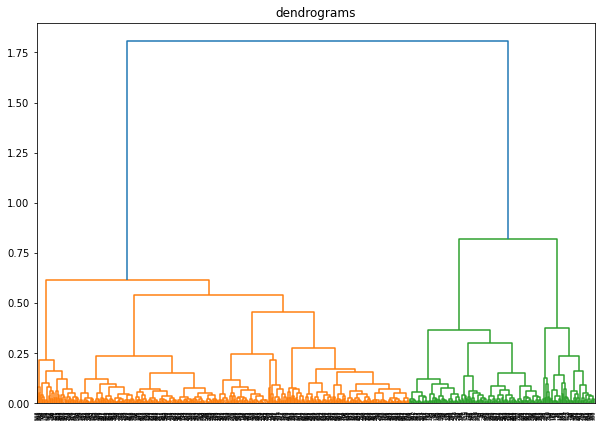

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

#### 15. The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1 and cut the dendrogram :

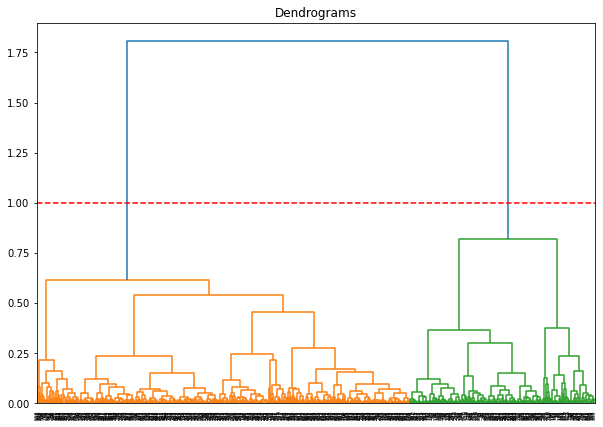

In [34]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=1,color='r', linestyle='--')
#plt.ylim(bottom=0, top=18) # adjust the y-axis limits
plt.show()

#### 16. We have 2 clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters :

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                               linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

##### We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

#### 17. Lets now visualize the two clusters :

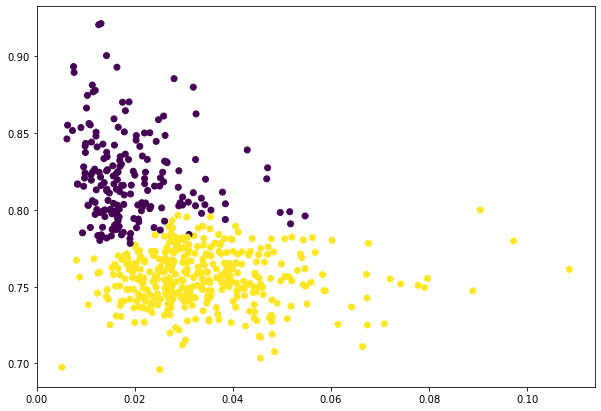

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['texture_worst'], data_scaled['area_worst'], c=cluster.labels_)

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - 2 Dataset yang saya gunakan pada week ini 2 2 nya berisi data numerikal dan kategorikal sehingga bisa mendukung proses pengolahan data dari awal hingga selesai. Kemudian pada dataset breastcancer terdapat missing data sehingga saya perlu drop terlebih dahulu sebelum melakukan proses pengolahan data.
    - Hierarki clustering merupakan sebuah metode pengelompokan (clustering) data yang berdasarkan pada struktur hierarki atau bertingkat. Metode ini mengelompokkan data ke dalam suatu struktur berupa pohon yang disebut dendrogram, di mana setiap simpul pada dendrogram merepresentasikan suatu cluster atau kelompok data.
    - Hasil run dari dendogram untuk dataset NBA menyimpulkan bahwa jumlah cluster yang dihasilkan ada n=3 cluster, sedangkan untuk run dendrogram untuk dataset breastcancer berjumlah 2 cluster.
    - Pada dataset breastcancer tepatnya column 'diagnosis' yang rownya berisi data kategorikal yakni 'M' dan 'B' saya perlu ubah terlebih dahulu menggunakan encoding dengan cara mengubah alias M dan B menjadi 0 dan 1, karena pada proses berikutnya memerlukan data numerik dan tidak boleh ada Char maupun object pada setiap COLUMN breastcancer yakni proses normalisasi data.

---

In [37]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Christopher Darren
NIM: 		00000054804
Time-stamp:	2023-05-04 19:55:07.329487


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [38]:
!jupyter nbconvert --to html "./IF540_Kelas_EL_00000054804_Christopher Darren_Week10.ipynb" --output-dir="./"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern './IF540_Kelas_EL_00000054804_Christopher Darren_Week10.ipynb' matched no files


    PostProcessor class used to write the
                                        results of the conversion
    Default: ''
    Equivalent to: [--NbConvertApp.postprocessor_class]
--output=<Unicode>
    overwrite base name use for output files.
                can only be used when converting one notebook at a time.
    Default: ''
    Equivalent to: [--NbConvertApp.output_base]
--output-dir=<Unicode>
    Directory to write output(s) to. Defaults
                                  to output to the directory of each notebook. To recover
                                  previous default behaviour (outputting to the current 
                                  working directory) use . as the flag value.
    Default: ''
    Equivalent to: [--FilesWriter.build_directory]
--reveal-prefix=<Unicode>
    The URL prefix for reveal.js (version 3.x).
            This defaults to the reveal CDN, but can be any url pointing to a copy 
            of reveal.js. 
            For speaker notes to work, t